<a href="https://colab.research.google.com/github/FSDAwaesf/CNN_Model_Transfer_learning/blob/main/cats_and_dogs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')
import os
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

Mounted at /content/mydrive


In [ ]:
dogs_trian="/content/mydrive/MyDrive/AmitAI3/dataset/training_set/dogs"
cats_train="/content/mydrive/MyDrive/AmitAI3/dataset/training_set/cats"
cats_test="/content/mydrive/MyDrive/AmitAI3/dataset/test_set/cats"
dogs_test="/content/mydrive/MyDrive/AmitAI3/dataset/test_set/dogs"

In [ ]:
def load_images(path):
  images_name=os.listdir(path)
  listofimages=[]
  for i in images_name:
    img=cv2.imread(path+i)
    listofimages.append(img)
  return listofimages
    

In [ ]:
dogsimages=load_images(dogs_trian+'/')
catsimages=load_images(cats_train+'/')

In [ ]:
print(len(dogsimages),len(catsimages))

4000 4000


In [ ]:
labels=[]
training_images=[]

In [ ]:
for i in range(len(dogsimages)):
  training_images.append(dogsimages[i])
  training_images.append(catsimages[i])
  labels.append(1)
  labels.append(0)
  



```
##Visiualization



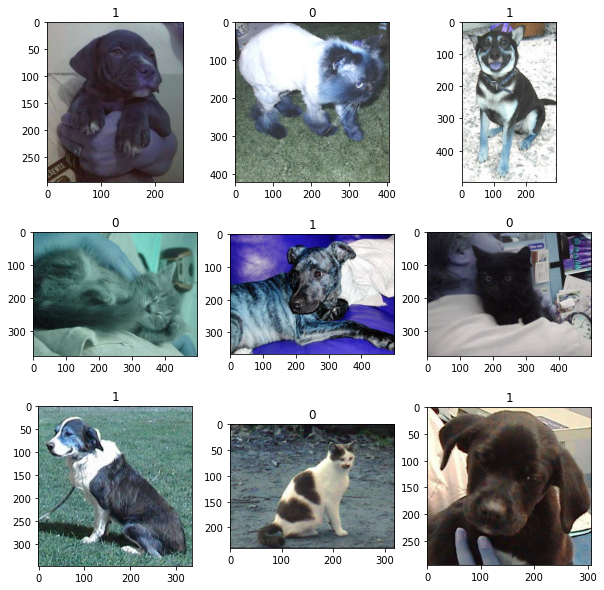

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(training_images[i])
  plt.title(labels[i])

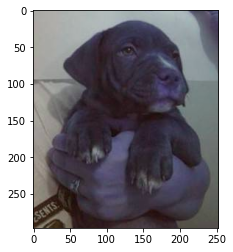

In [ ]:
plt.imshow(training_images[0])

**Data Augmentation**

In [ ]:
def translate(image):
  width=image.shape[1]
  hight=image.shape[0]
  T=np.float32([[1,0,width/4],[0,1,hight/4]])
  translated=cv2.warpAffine(image,T,(width,hight))
  return translated


  

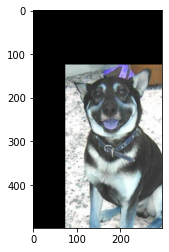

In [ ]:
plt.imshow(translate(training_images[2]))

In [ ]:
def rotate(image):
  width=image.shape[1]
  hight=image.shape[0]
  matrix=cv2.getRotationMatrix2D((width/2,hight/2),45,.5)
  rotated=cv2.warpAffine(image,matrix,(width,hight))
  return rotated


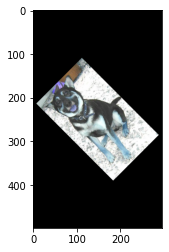

In [ ]:
plt.imshow(rotate(training_images[2]))

In [ ]:
def flipaixsrow(image):
  return cv2.flip(image,0)
  
def flipaxiscol(image):
  return cv2.flip(image,1)

In [ ]:
def augmantation(image,label):
  if np.random.rand()<.5:
    image=translate(image)
  if np.random.rand()<.5:
    image=flipaixsrow(image)
  if np.random.rand()<.5:
    image=flipaxiscol(image)
  if np.random.rand()<.5:
     image=rotate(image)
  
  return image,label


**Reshape**

In [ ]:
dim1=[]
dim2=[]
for i in training_images:
  dim1.append(i.shape[0])
  dim2.append(i.shape[1])

In [ ]:
realshape=[int(np.array(dim1).mean()),int(np.array(dim2).mean())]
realshape

[360, 403]

In [ ]:
def image_processing(image):
  image=np.asarray(image)
  return cv2.resize(image,(350,350))

In [ ]:
import random
def data_generator(images,labels,batch_size,istraining):
  while True:
    batch_img = []
    batch_label = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(images) - 1)
      
      if istraining:
        image, label = augmantation(images[random_index], labels[random_index])
     
      else:
        image = images[random_index]
        label = labels[random_index]
      
      im = image_processing(image)
      batch_img.append(im)
      batch_label.append(label)
    yield (np.array(batch_img), np.array(batch_label)) 
      

In [ ]:
data_generator(training_images,labels,20,1)

<generator object data_generator at 0x7fd40e5d45d0>

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D ,Flatten,Dropout,Dense

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(350,350,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 86, 86, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

history = model.fit_generator(data_generator(training_images, labels, 20, 1),
                                  steps_per_epoch=50, 
                                  epochs=2,
                                  validation_data=data_generator(training_images, labels, 10, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


50/50 [==============================] - 302s 6s/step - loss: 0.6939 - accuracy: 0.5430 - val_loss: 0.6924 - val_accuracy: 0.5117
Epoch 2/2
50/50 [==============================] - 311s 6s/step - loss: 0.7016 - accuracy: 0.5050 - val_loss: 0.6920 - val_accuracy: 0.5428


In [ ]:
data_generator(training_images,labels,20,1)

<generator object data_generator at 0x7f7f570d9650>

In [ ]:
from tensorflow.keras.applications import VGG16
model_transfeared=VGG16(include_top=False,weights="imagenet",input_shape=(350,350,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model_transfeared.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0     

In [ ]:
from tensorflow.keras import Model

In [ ]:
def creat_model():
  model=VGG16(include_top=False,weights="imagenet",input_shape=(350,350,3))

  for layers in model.layers:
    layers.trainable=False

  modelout1=model.output
  modelout2=Flatten()(modelout1)
  modelout3=Dense(2030,activation='relu')(modelout2)
  modelout4=Dense(1,activation='sigmoid')(modelout3)
  model=Model(model.input,modelout4)
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model



In [ ]:
m=creat_model()

In [ ]:
m.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0   

In [ ]:
history=m.fit_generator(data_generator(training_images,labels,20,1),
                        steps_per_epoch=50,
                        epochs=1,
                        validation_data=data_generator(training_images, labels, 10, 0)
                        ,validation_steps=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


50/50 [==============================] - ETA: 0s - loss: 20.9595 - accuracy: 0.7610 